### BACKGROUND: 

The given data contains short and crisp movie reviews by various critics.

 

QUESTIONS-

 

1. Import Textdata. Do the essential cleaning of the data.

 

2. Find top 20 words sorted by frequency.

 

3. Create a wordcloud using the given data.

 

4. List the number of lines having sentiments ‘Negative',  'Neutral’ and ‘Positive’.

 

5. Plot bar graph showing top 15 words by frequency.

##### Question 1: `Import Textdata. Do the essential cleaning of the data.`

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK imports for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# TextBlob for sentiment analysis
from textblob import TextBlob

# Download required NLTK data (with fallback)
print("Setting up NLTK data...")
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    print("✓ NLTK data downloaded successfully!")
except:
    print("⚠ Using fallback stopwords list (NLTK download unavailable)")

print("✓ All libraries imported successfully!\n")

Setting up NLTK data...
✓ NLTK data downloaded successfully!
✓ All libraries imported successfully!



In [22]:
# ===============================================================================
# STEP 1: IMPORT AND CLEAN THE DATA
# ===============================================================================
print("STEP 1: Import and Clean the Data")
print("=" * 80)

# 1.1: Read the text file
print("\n1.1 Reading the text file...")
with open(r"C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\data\raw\Textdata.txt", 'r', encoding='utf-8') as file:
    text_data = file.read()

print(f"✓ File loaded successfully!")
print(f"Total characters: {len(text_data)}")
print(f"First 200 characters:\n{text_data[:200]}...\n")


# 1.2: Split text into lines (each line is a sentence/review segment)
print("1.2 Splitting text into lines...")
lines = text_data.split('\n')
lines = [line.strip() for line in lines if line.strip()]  # Remove empty lines
print(f"✓ Total lines: {len(lines)}")
print(f"Sample line: {lines[0]}\n")

STEP 1: Import and Clean the Data

1.1 Reading the text file...
✓ File loaded successfully!
Total characters: 8271
First 200 characters:
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , b...

1.2 Splitting text into lines...
✓ Total lines: 60
Sample line: films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .



In [23]:
# Create a Text cleaning Function

print("1.3 Creating text cleaning function...")

def clean_text(text):
    """
    Clean text data by:
    - Converting to lowercase
    - Removing special characters and numbers
    - Removing extra whitespace
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers, keep only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Clean all lines
cleaned_lines = [clean_text(line) for line in lines]
print(f"✓ Text cleaned!")
print(f"Original: {lines[0]}")
print(f"Cleaned:  {cleaned_lines[0]}\n")

1.3 Creating text cleaning function...
✓ Text cleaned!
Original: films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .
Cleaned:  films adapted from comic books have had plenty of success whether theyre about superheroes batman superman spawn or geared toward kids casper or the arthouse crowd ghost world but theres never really been a comic book like from hell before



In [24]:
print("1.4 Tokenizing and removing stopwords...")

# Load English stopwords automatically
stop_words = set(stopwords.words('english'))

print(f"Number of stopwords: {len(stop_words)}")
print(f"Sample stopwords: {list(stop_words)[:10]}")

def tokenize_and_remove_stopwords(text):
    """
    Tokenize text and remove stopwords using NLTK's built-in tools.
    """
    # Tokenize into words
    words = word_tokenize(text.lower())  # lowercase for consistency
    
    # Filter out stopwords and non-alphabetic tokens
    filtered_words = [
        word for word in words 
        if word.isalpha() and word not in stop_words and len(word) > 2
    ]
    
    return filtered_words

# Apply to all cleaned lines
all_words = []
for line in cleaned_lines:
    words = tokenize_and_remove_stopwords(line)
    all_words.extend(words)

print(f"\n✓ Tokenization complete!")
print(f"Total words (after removing stopwords): {len(all_words)}")
print(f"Sample words: {all_words[:20]}\n")

1.4 Tokenizing and removing stopwords...
Number of stopwords: 198
Sample stopwords: ['now', "hadn't", 'each', 'll', 'into', 'ain', 'both', 'herself', "it'd", "we'd"]

✓ Tokenization complete!
Total words (after removing stopwords): 727
Sample words: ['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world']



##### Question 2: `Find top 20 words sorted by frequency.`

In [25]:
print("\n" + "=" * 80)
print("STEP 2: Find Top 20 Words by Frequency")
print("=" * 80)

"""
We used Counter from collections to count word frequencies
Counter creates a dictionary with words as keys and their counts as values
"""

# Count word frequencies
word_freq = Counter(all_words)

# Get top 20 most common words
top_20_words = word_freq.most_common(20)

print("\nTop 20 Most Frequent Words:")
print("-" * 50)
print(f"{'Rank':<6} {'Word':<20} {'Frequency':<10}")
print("-" * 50)

for rank, (word, freq) in enumerate(top_20_words, 1):
    print(f"{rank:<6} {word:<20} {freq:<10}")

print(f"\nTotal unique words: {len(word_freq)}")


STEP 2: Find Top 20 Words by Frequency

Top 20 Most Frequent Words:
--------------------------------------------------
Rank   Word                 Frequency 
--------------------------------------------------
1      film                 10        
2      like                 7         
3      dont                 7         
4      make                 7         
5      even                 6         
6      movie                6         
7      comic                5         
8      get                  5         
9      pretty               5         
10     films                4         
11     world                4         
12     really               4         
13     say                  4         
14     little               4         
15     good                 4         
16     see                  4         
17     one                  4         
18     teen                 4         
19     book                 3         
20     moore                3         

Total uni

##### Question 3: `Create a wordcloud`


STEP 3: Create a WordCloud

Generating WordCloud...
✓ WordCloud saved to: C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\reports\wordcloud.png


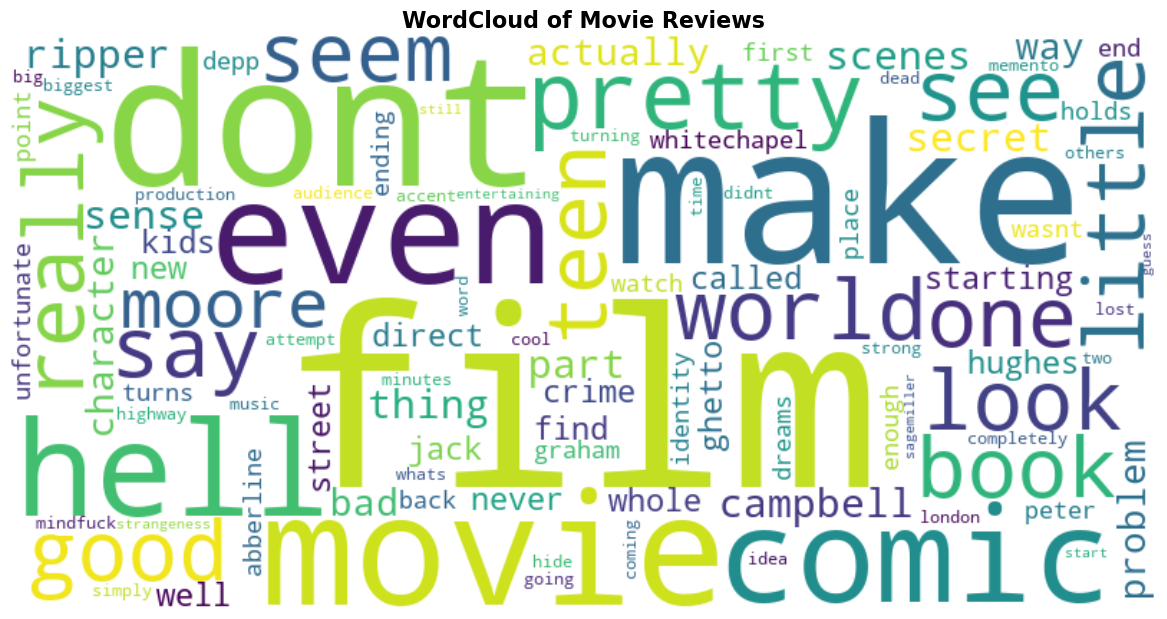

In [26]:
print("\n" + "=" * 80)
print("STEP 3: Create a WordCloud")
print("=" * 80)

"""
A WordCloud is a visual representation where word size represents frequency
More frequent words appear larger in the cloud
"""

print("\nGenerating WordCloud...")

# Combine all words back into a single string
text_for_wordcloud = ' '.join(all_words)

# Create WordCloud object
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(text_for_wordcloud)

# Create the plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Reviews', fontsize=16, fontweight='bold')
plt.tight_layout(pad=0)

# Save the wordcloud
wordcloud_path = r"C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\reports\wordcloud.png"
plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')
print(f"✓ WordCloud saved to: {wordcloud_path}")

plt.show()

##### Question 4: `Sentiment Analysis`

In [27]:
print("\n" + "=" * 80)
print("STEP 4: Sentiment Analysis - Count Positive, Negative, and Neutral Lines")
print("=" * 80)

"""
For sSntiment Analysis We used TextBlob which gives a 
polarity score between -1 (negative) and +1 (positive)

Classification:
- Polarity > 0.05  → Positive
- Polarity < -0.05 → Negative
- Otherwise        → Neutral
"""

def get_sentiment(text):
  
    # Create TextBlob object
    blob = TextBlob(text)
    
    # Get polarity score
    polarity = blob.sentiment.polarity
    
    # Classify sentiment
    if polarity > 0.05:
        return 'Positive', polarity
    elif polarity < -0.05:
        return 'Negative', polarity
    else:
        return 'Neutral', polarity

# Analyze sentiment for each line
print("\nAnalyzing sentiment for each line...")

sentiments = []
sentiment_details = []

for i, line in enumerate(lines):
    sentiment, polarity = get_sentiment(line)
    sentiments.append(sentiment)
    sentiment_details.append({
        'line_number': i + 1,
        'text': line[:80] + '...' if len(line) > 80 else line,
        'sentiment': sentiment,
        'polarity': polarity
    })

# Count sentiments
sentiment_counts = Counter(sentiments)

print("\n" + "=" * 50)
print("SENTIMENT ANALYSIS RESULTS")
print("=" * 50)
print(f"{'Sentiment':<15} {'Count':<10} {'Percentage':<10}")
print("-" * 50)

total_lines = len(sentiments)
for sentiment in ['Positive', 'Negative', 'Neutral']:
    count = sentiment_counts[sentiment]
    percentage = (count / total_lines) * 100
    print(f"{sentiment:<15} {count:<10} {percentage:.1f}%")

print("-" * 50)
print(f"{'Total':<15} {total_lines:<10} 100.0%")

# Show some examples
print("\n" + "=" * 50)
print("Sample Sentiment Classifications:")
print("=" * 50)

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    examples = [d for d in sentiment_details if d['sentiment'] == sentiment_type][:2]
    if examples:
        print(f"\n{sentiment_type} Examples:")
        for ex in examples:
            print(f"  Line {ex['line_number']}: {ex['text']}")
            print(f"  Polarity: {ex['polarity']:.3f}\n")

# Save detailed results to CSV
sentiment_df = pd.DataFrame(sentiment_details)
sentiment_csv_path = r"C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\reports\sentiment_analysis.csv"
sentiment_df.to_csv(sentiment_csv_path, index=False)
print(f"✓ Detailed sentiment analysis saved to: {sentiment_csv_path}")


STEP 4: Sentiment Analysis - Count Positive, Negative, and Neutral Lines

Analyzing sentiment for each line...

SENTIMENT ANALYSIS RESULTS
Sentiment       Count      Percentage
--------------------------------------------------
Positive        23         38.3%
Negative        14         23.3%
Neutral         23         38.3%
--------------------------------------------------
Total           60         100.0%

Sample Sentiment Classifications:

Positive Examples:
  Line 1: films adapted from comic books have had plenty of success , whether they're abou...
  Polarity: 0.175

  Line 2: for starters , it was created by alan moore ( and eddie campbell ) , who brought...
  Polarity: 0.112


Negative Examples:
  Line 3: to say moore and campbell thoroughly researched the subject of jack the ripper w...
  Polarity: -0.130

  Line 5: in other words , don't dismiss this film because of its source .
  Polarity: -0.125


Neutral Examples:
  Line 8: the ghetto in question is , of course , whitecha

##### Question 5: `Plot Graph of top 15 words`


STEP 5: Create Bar Graph of Top 15 Words by Frequency

Creating bar graph...
✓ Bar graph saved to: C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\reports\top_15_words_bargraph.png


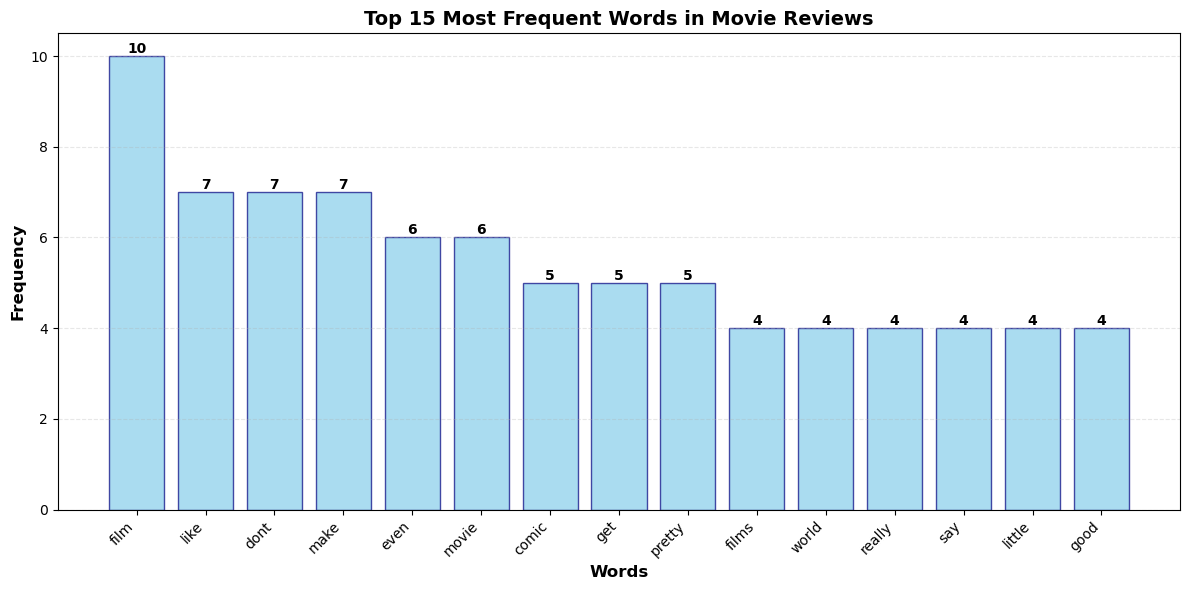

In [28]:
print("\n" + "=" * 80)
print("STEP 5: Create Bar Graph of Top 15 Words by Frequency")
print("=" * 80)


print("\nCreating bar graph...")

# Get top 15 words
top_15_words = word_freq.most_common(15)
words = [word for word, freq in top_15_words]
frequencies = [freq for word, freq in top_15_words]

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(words, frequencies, color='skyblue', edgecolor='navy', alpha=0.7)

# Customize the plot
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Frequent Words in Movie Reviews', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

# Save the plot
bargraph_path = r"C:\Users\willi\GitHub\TMNLP_movie_review_txt_analysis_PY\reports\top_15_words_bargraph.png"
plt.savefig(bargraph_path, dpi=300, bbox_inches='tight')
print(f"✓ Bar graph saved to: {bargraph_path}")

plt.show()


` Summary and Additional Insights`

In [29]:
print("\n" + "=" * 80)
print("ANALYSIS SUMMARY")
print("=" * 80)

print(f"""
Data Statistics:
- Total lines in file: {len(lines)}
- Total words (after cleaning): {len(all_words)}
- Unique words: {len(word_freq)}

Top 5 Most Common Words:
""")

for i, (word, freq) in enumerate(word_freq.most_common(5), 1):
    print(f"  {i}. '{word}' - {freq} times")

print(f"""
Sentiment Distribution:
- Positive: {sentiment_counts['Positive']} lines ({(sentiment_counts['Positive']/total_lines)*100:.1f}%)
- Negative: {sentiment_counts['Negative']} lines ({(sentiment_counts['Negative']/total_lines)*100:.1f}%)
- Neutral:  {sentiment_counts['Neutral']} lines ({(sentiment_counts['Neutral']/total_lines)*100:.1f}%)

Output Files Created:
1. wordcloud.png - Visual representation of word frequencies
2. sentiment_analysis.csv - Detailed sentiment analysis for each line
3. top_15_words_bargraph.png - Bar graph of most frequent words
""")

print("=" * 80)
print("END OF ANALYSIS")
print("=" * 80)



ANALYSIS SUMMARY

Data Statistics:
- Total lines in file: 60
- Total words (after cleaning): 727
- Unique words: 551

Top 5 Most Common Words:

  1. 'film' - 10 times
  2. 'like' - 7 times
  3. 'dont' - 7 times
  4. 'make' - 7 times
  5. 'even' - 6 times

Sentiment Distribution:
- Positive: 23 lines (38.3%)
- Negative: 14 lines (23.3%)
- Neutral:  23 lines (38.3%)

Output Files Created:
1. wordcloud.png - Visual representation of word frequencies
2. sentiment_analysis.csv - Detailed sentiment analysis for each line
3. top_15_words_bargraph.png - Bar graph of most frequent words

END OF ANALYSIS
